In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [2]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

    def setWeights(self,wih,who):
        self.wih = wih
        self.who = who

In [4]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [5]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r') 
training_data_list = training_data_file.readlines()
training_data_file.close()

In [6]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

#Guardar datoas desde archivo de texto
numpy.savetxt('savedWIH.csv', n.wih, delimiter=",")
numpy.savetxt('savedWHO.csv', n.who, delimiter=",")

"""
print("WIH: ",n.wih)
print("WHO: ",n.who)
print(len(n.wih))
print(len(n.who))
"""

'\nprint("WIH: ",n.wih)\nprint("WHO: ",n.who)\nprint(len(n.wih))\nprint(len(n.who))\n'

In [ ]:
# train the neural network but saving all weights during training

# epochs is the number of times the training data set is used for training
epochs = 3

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

        #Guardar los nuevos pesos en un archivo de texto
        numpy.savetxt('savedWeights.csv', (n.wih,n.who), delimiter=",")
        pass
    pass

"""
print("WIH: ",n.wih)
print("WHO: ",n.who)
print(len(n.wih))
print(len(n.who))
"""

In [7]:
#Leer datos de un archivo de texto
trainedWIH = numpy.loadtxt('savedWIH.csv', delimiter=',')
trainedWHO = numpy.loadtxt('savedWHO.csv', delimiter=',')
n.setWeights(trainedWIH,trainedWHO)

In [8]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [11]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #print(inputs)
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9718


In [10]:
# load the mnist training data CSV file into a list
test_data_file_10 = open("mnist_dataset/mnist_test_10.csv", 'r') 
test_data_list_10 = test_data_file_10.readlines()
test_data_file_10.close()

In [15]:
#Transform Paint Images into grayscale by 28x28 size
import os
import scipy.misc
import imageio
import cv2

os.chdir('DatasetPropio')
directory = os.listdir('.')
print(directory)

i=0
for imageFile in directory:
    print(imageFile)
    img = cv2.imread(imageFile, cv2.IMREAD_UNCHANGED)
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resizedImg = cv2.resize(grayImg, (28,28), interpolation = cv2.INTER_AREA)
    cv2.imwrite("../DatasetPropio_28x28/"+str(i)+"_28x28.jpg", resizedImg)

    #cv2.imshow("Resized image", resizedImg)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    i += 1

['0_28x28.png', '1_28x28.png', '2_28x28.png', '3_28x28.png', '4_28x28.png', '5_28x28.png', '6_28x28.png', '7_28x28.png', '8_28x28.png', '9_28x28.png']
0_28x28.png


error: OpenCV(4.6.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xf2302844::Set<1,-1,-1>,struct cv::impl::A0xf2302844::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
#Transform Paint Images into black and white by 28x28 size
import os
import scipy.misc
import imageio
import cv2


def convertToBandW(dir,dirToWrite):
    os.chdir(dir)
    directory = os.listdir('.')

    print(directory)

    i=0
    for imageFile in directory:
        #print(imageFile)
        #imageFile = "./DatasetPropio-B&W_28x28/" + imageFile
        img = cv2.imread(imageFile, cv2.IMREAD_UNCHANGED)
        grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        (thresh, blackAndWhiteImage) = cv2.threshold(grayImg, 254, 255, cv2.THRESH_BINARY)

        resizedImg = cv2.resize(blackAndWhiteImage, (28,28), interpolation = cv2.INTER_AREA)
        cv2.imwrite("../" + dirToWrite + "/"+str(i)+"_BW_28x28.jpg", resizedImg)

        #cv2.imshow("Resized image", resizedImg)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        i += 1

    os.chdir('..')

convertToBandW("DatasetPropio2","DatasetPropio2-B&W_28x28")

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
0.jpg
1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg


ProyectoMultis-MNIST
ProyectoMultis-MNIST


C:\Users\amcr0\AppData\Local\Temp\ipykernel_37428\601114692.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array = imageio.imread(e)                   #Read original image


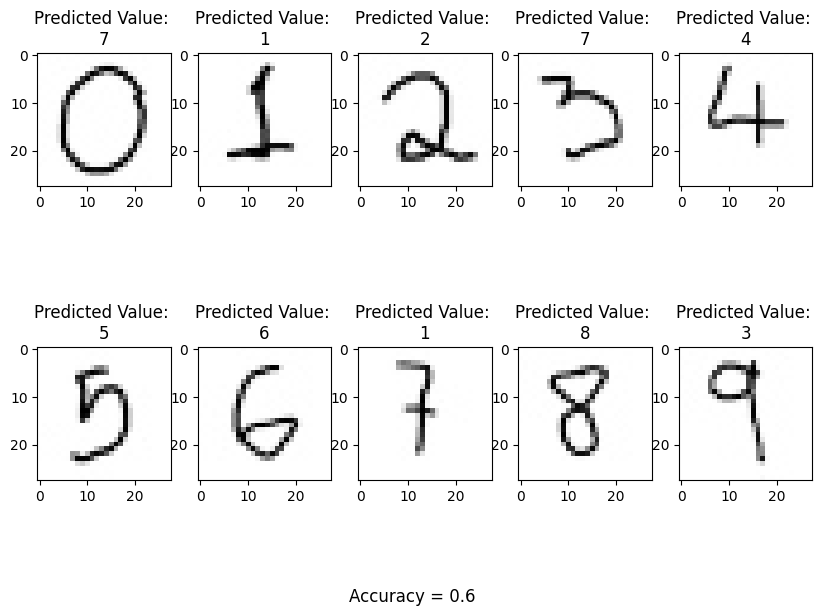

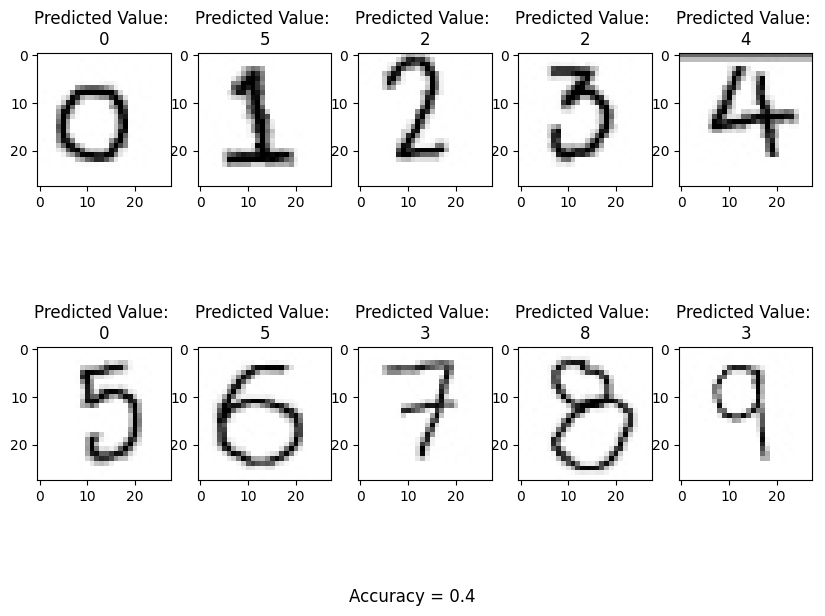

In [33]:
#Realiza una predicción de un daataset de imagenes PNG o JPG

import os
import scipy.misc
import imageio
import cv2

def predictDataset(dir):

    predictedValues = []

    #os.chdir("./ProyectoMultis-MNIST")
    current_working_directory = os.getcwd()
    current_working_directory = current_working_directory.split('\\')[-1]
    if current_working_directory == "ProyectoMultis-MNIST":
        #Prediction in Black & White
        images_28x28 = os.listdir('./Datasets/' + dir +'/')
        #print(images_28x28)

        #Dibujando figura de imagenes
        fig = matplotlib.pyplot.figure(figsize=(10, 7))
        rows = 2
        columns = 5
        i = 1
        for e in images_28x28:
            e = "./Datasets/"+ dir +"/" + e
            img_array = imageio.imread(e)                   #Read original image
            img_data = 255.0 - img_array.reshape(784)       #Image Resolution change to 28x28
            img_data_norm = (img_data / 255.0 * 0.99 ) + 0.01    #Data Normalization
            #print(img_array)
            #print(img_data)

            output = n.query(img_data_norm)
            predictedValue = int(numpy.argmax(output))
            predictedValues.append(predictedValue)

            #Printing image
            image_array = numpy.asfarray(img_data_norm[:]).reshape((28,28))
            fig.add_subplot(rows, columns, i)
            matplotlib.pyplot.title("Predicted Value: \n" + str(predictedValue))
            matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')
            i += 1
        
        #Calculando la presición
        c = 0
        for i in range(len(predictedValues)):
            if predictedValues[i] == i:
                c += 1
        accuracy = c/len(predictedValues)
        fig.supxlabel('Accuracy = ' + str(accuracy))

        return predictedValues
    else:
        print("Change directory to: ProyectoMultis-MNIST")
        print(current_working_directory)



res = predictDataset("DatasetJessie1/DatasetJessie1_28x28")
res2 = predictDataset("DatasetJessie2/DatasetJessie2-B&W_28x28")

#print("Expected  =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]")
#print("Dataset 1 = ",res)
#print("Dataset 2 = ",res2)

C:\Users\amcr0\AppData\Local\Temp\ipykernel_37428\3088641909.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array = imageio.imread(e)                   #Read original image (Array bidimensional 28x28 BLANCO:255 / NEGRO: 0)


[[9.93296508e-01]
 [2.13052284e-03]
 [4.64188189e-04]
 [9.17796194e-03]
 [4.43040770e-03]
 [1.58348971e-03]
 [1.44061950e-02]
 [3.43671853e-02]
 [4.21930895e-03]
 [3.78207583e-02]]
[[7.15408114e-03]
 [3.75409092e-03]
 [9.06373600e-01]
 [2.62083243e-02]
 [3.73651741e-03]
 [1.78331063e-02]
 [6.14230515e-03]
 [2.11061320e-03]
 [4.27668727e-02]
 [3.19046635e-04]]
[[0.00417154]
 [0.00734441]
 [0.95739107]
 [0.01250028]
 [0.00452296]
 [0.00688398]
 [0.00823301]
 [0.02229756]
 [0.00267755]
 [0.00912168]]
[[6.10454231e-03]
 [8.90902681e-03]
 [2.95193951e-03]
 [9.98595259e-01]
 [5.21476058e-03]
 [6.80355105e-03]
 [3.69491667e-04]
 [1.98496696e-03]
 [1.00896583e-03]
 [4.99125202e-02]]
[[0.01487668]
 [0.00230005]
 [0.03574649]
 [0.00089007]
 [0.6916221 ]
 [0.00341379]
 [0.00409215]
 [0.00614628]
 [0.00097373]
 [0.79432056]]
[[0.00276791]
 [0.00339342]
 [0.00262936]
 [0.23678305]
 [0.00577308]
 [0.81355867]
 [0.00842871]
 [0.00600235]
 [0.04792649]
 [0.02347364]]
[[0.02120211]
 [0.00228366]
 [0.02

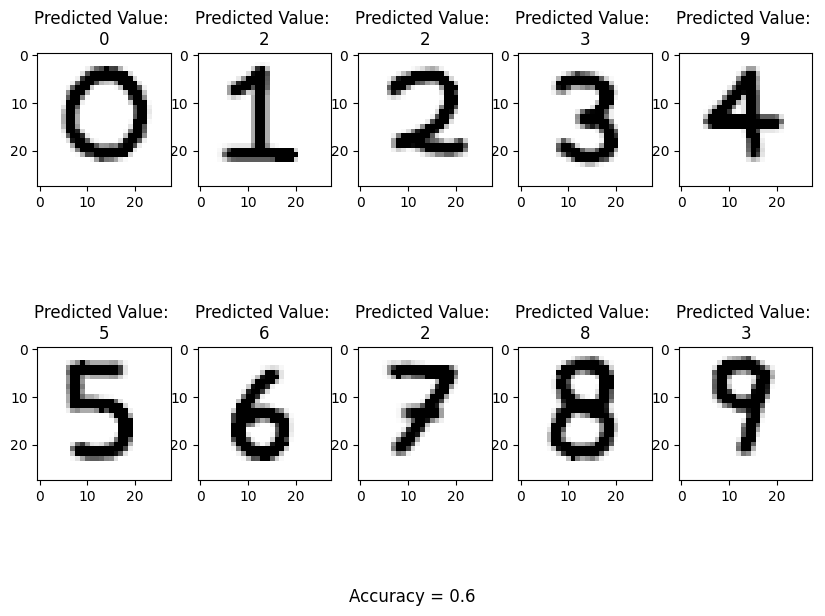

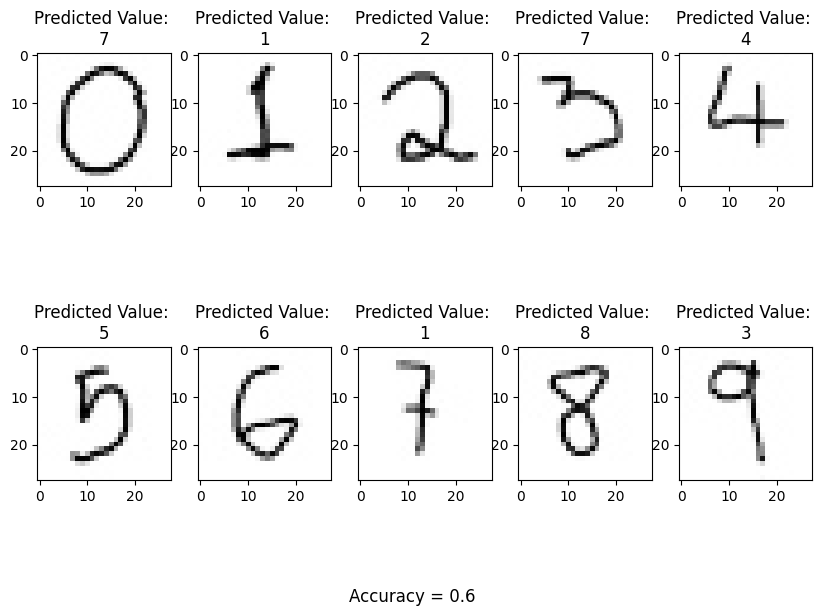

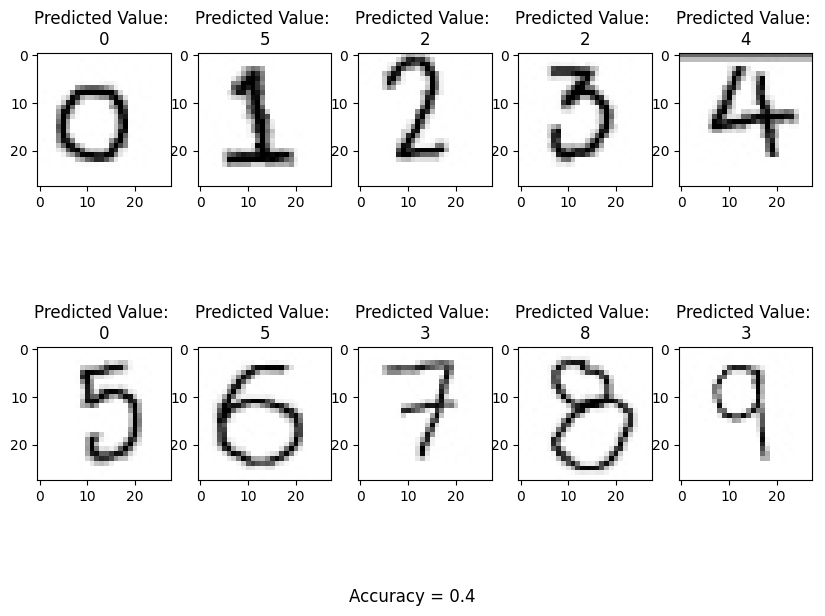

In [53]:
#Realiza una predicción de un dataset de imagenes PNG o JPG

import os
import scipy.misc
import imageio
import cv2

def predictDataset(dir):

    predictedValues = []

    #Prediction in Black & White
    images_28x28 = os.listdir('./Datasets/' + dir +'/')
    #print(images_28x28)

    #Dibujando figura de imagenes
    fig = matplotlib.pyplot.figure(figsize=(10, 7))
    rows = 2
    columns = 5
    i = 1
    for e in images_28x28:
        e = "./Datasets/"+ dir +"/" + e
        img_array = imageio.imread(e)                   #Read original image (Array bidimensional 28x28 BLANCO:255 / NEGRO: 0)
        #print(image_array)
        img_data = 255.0 - img_array.reshape(784)       #Image Resolution change to 28x28 (Vector de 784 BLANCO:0 / NEGRO: 255)
        img_data_norm = (img_data / 255.0 * 0.99 ) + 0.01    #Data Normalization (Vector de 728 BLANCO:0.1 / NEGRO: 0.99)
        #print(len(img_array[0]))
        
        #print(img_data.reshape(28,28))

        output = n.query(img_data_norm)
        print(output)
        predictedValue = int(numpy.argmax(output))
        predictedValues.append(predictedValue)

        #Printing image
        image_array = numpy.asfarray(img_data_norm[:]).reshape((28,28))
        fig.add_subplot(rows, columns, i)
        matplotlib.pyplot.title("Predicted Value: \n" + str(predictedValue))
        matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')
        i += 1

    #Calculando la presición
    c = 0
    for i in range(len(predictedValues)):
        if predictedValues[i] == i:
            c += 1
    accuracy = c/len(predictedValues)
    fig.supxlabel('Accuracy = ' + str(accuracy))
    
    return predictedValues


res = predictDataset("DatasetAlexys")
res2 = predictDataset("DatasetJessie1/DatasetJessie1_28x28")
res3 = predictDataset("DatasetJessie2/DatasetJessie2-B&W_28x28")


[[0.01340928]
 [0.01608601]
 [0.00311343]
 [0.01280583]
 [0.00574688]
 [0.00900506]
 [0.00761414]
 [0.9835225 ]
 [0.00997143]
 [0.00334655]]
[[3.24654633e-02]
 [5.08547856e-03]
 [9.70806577e-01]
 [1.69179284e-02]
 [1.78613328e-03]
 [3.47869104e-03]
 [1.37891635e-03]
 [6.50742544e-04]
 [5.32481817e-03]
 [8.26823514e-04]]
[[0.0026063 ]
 [0.99235349]
 [0.00935421]
 [0.00267898]
 [0.00452331]
 [0.00777242]
 [0.00161924]
 [0.00829098]
 [0.00305897]
 [0.00515306]]
[[0.97598878]
 [0.00996378]
 [0.003718  ]
 [0.02820468]
 [0.00484167]
 [0.02224537]
 [0.00565   ]
 [0.01408544]
 [0.00655371]
 [0.01286797]]
[[7.67622978e-03]
 [6.90210693e-03]
 [6.19924846e-04]
 [1.28782803e-03]
 [9.84756765e-01]
 [2.99911050e-03]
 [6.94415509e-03]
 [1.34090712e-02]
 [1.25747955e-03]
 [1.74682330e-02]]
[[0.00543161]
 [0.99279136]
 [0.00844865]
 [0.00325113]
 [0.00765489]
 [0.01251203]
 [0.00148578]
 [0.01550079]
 [0.00708006]
 [0.00761852]]
[[0.00190026]
 [0.01339209]
 [0.00377034]
 [0.00141807]
 [0.99814925]
 [0.

Text(0.5, 0.01, 'Accuracy = 1.0')

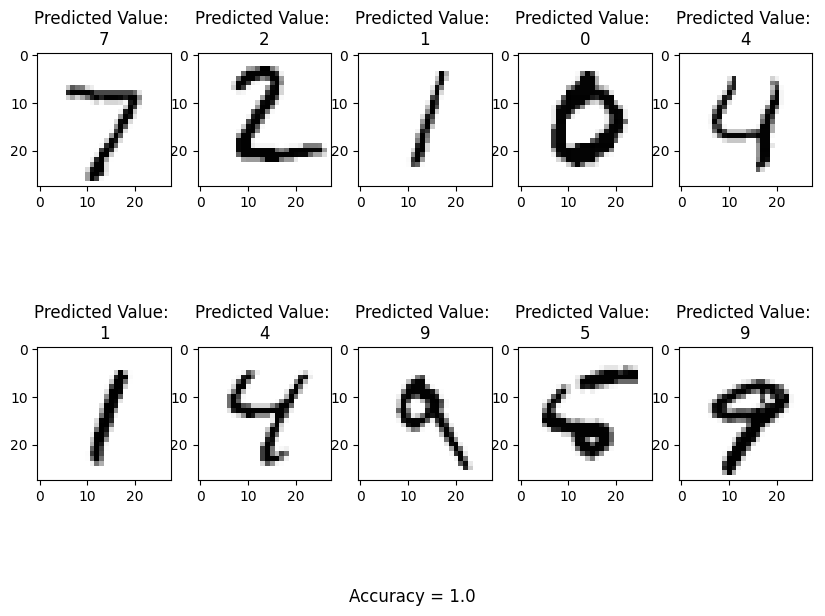

In [54]:
i = 1
scorecard = []
fig = matplotlib.pyplot.figure(figsize=(10, 7))
rows = 2
columns = 5
for record in test_data_list_10:
    
    testImage = record.split(',')
    correct_label = int(testImage[0])

    #Image prediction
    testImage2 = numpy.asfarray(testImage[1:])
    #print(testImage2.reshape(28,28))
    normTestImage = (testImage2 / 255.0 * 0.99) + 0.01
    output = n.query(normTestImage)
    print(output)
    predictedValue = int(numpy.argmax(output))

  
    #Select most likely class
    if (predictedValue == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    image_array = numpy.asfarray(testImage[1:]).reshape((28,28))
    fig.add_subplot(rows, columns, i)
    matplotlib.pyplot.title("Predicted Value: \n" + str(predictedValue))
    matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

    i += 1

scorecard_array = numpy.asarray(scorecard)
performance = scorecard_array.sum() / scorecard_array.size
fig.supxlabel('Accuracy = ' + str(performance))
